In [19]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


In [20]:
data = pd.read_csv("/Users/saeedkhalili/Desktop/SimpleChallenge/train.csv")

In [21]:
data.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,iPhone,M,0,62717,2,1,4,0
1,50,0.004733,desktop,F,0,64328,2,3,2,0
2,54,0.004129,laptop,M,0,83439,1,3,7,0
3,16,0.005117,Android,F,0,30110,2,3,0,0
4,37,0.003635,desktop,M,0,76565,2,1,5,0


In [22]:
data['device_type_cat'] = data['device_type'].astype('category')
data['device_type_cat'] = data['device_type_cat'].cat.codes

data['gender_cat'] = data['gender'].astype('category')
data['gender_cat'] = data['gender_cat'].cat.codes

data = data[['age', 'cost_of_ad','device_type_cat', 'gender_cat',
       'in_initial_launch_location', 'income', 'n_drivers', 'n_vehicles',
       'prior_ins_tenure', 'outcome']]

In [23]:
data.columns

Index(['age', 'cost_of_ad', 'device_type_cat', 'gender_cat',
       'in_initial_launch_location', 'income', 'n_drivers', 'n_vehicles',
       'prior_ins_tenure', 'outcome'],
      dtype='object')

In [24]:
data.corr()

,age,cost_of_ad,device_type_cat,gender_cat,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
age,1.000000,0.141522,-0.003466,-0.007633,-0.005112,0.747286,-0.005097,0.011210,0.644734,-0.011907
cost_of_ad,0.141522,1.000000,-0.010200,-0.498518,-0.000183,0.104408,-0.004596,-0.004071,0.086847,-0.077210
device_type_cat,-0.003466,-0.010200,1.000000,0.003430,-0.002653,-0.008591,0.004682,0.001662,-0.008693,-0.166496
gender_cat,-0.007633,-0.498518,0.003430,1.000000,0.005550,0.001766,-0.004564,-0.010000,-0.005393,0.140754
in_initial_launch_location,-0.005112,-0.000183,-0.002653,0.005550,1.000000,0.003423,-0.001030,0.010530,0.008093,0.116577
income,0.747286,0.104408,-0.008591,0.001766,0.003423,1.000000,-0.005122,0.005697,0.486532,0.006375
n_drivers,-0.005097,-0.004596,0.004682,-0.004564,-0.001030,-0.005122,1.000000,0.006619,-0.003123,0.100105
n_vehicles,0.011210,-0.004071,0.001662,-0.010000,0.010530,0.005697,0.006619,1.000000,0.004266,-0.193192
prior_ins_tenure,0.644734,0.086847,-0.008693,-0.005393,0.008093,0.486532,-0.003123,0.004266,1.000000,-0.029934
outcome,-0.011907,-0.077210,-0.166496,0.140754,0.116577,0.006375,0.100105,-0.193192,-0.029934,1.000000


In [25]:
df = data[['age', 'cost_of_ad', 'device_type_cat', 'gender_cat',
       'in_initial_launch_location', 'n_drivers', 'n_vehicles',
       'prior_ins_tenure', 'outcome']]

In [26]:
df.head()

,age,cost_of_ad,device_type_cat,gender_cat,in_initial_launch_location,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,2,1,0,2,1,4,0
1,50,0.004733,1,0,0,2,3,2,0
2,54,0.004129,3,1,0,1,3,7,0
3,16,0.005117,0,0,0,2,3,0,0
4,37,0.003635,1,1,0,2,1,5,0


In [27]:
X = df.iloc[:,:9]
y = df.iloc[:,-1]



scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

pca = PCA(2)
projected = pca.fit_transform(X)

In [ ]:
X_train,X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

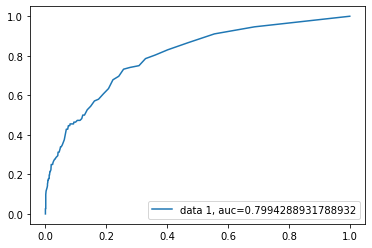

In [2]:

data = pd.read_csv("/Users/saeedkhalili/Desktop/SimpleChallenge/train.csv")

data['device_type_cat'] = data['device_type'].astype('category')
data['device_type_cat'] = data['device_type_cat'].cat.codes

data['gender_cat'] = data['gender'].astype('category')
data['gender_cat'] = data['gender_cat'].cat.codes

df = data[['age', 'cost_of_ad', 'device_type_cat', 'gender_cat',
       'in_initial_launch_location', 'income', 'n_drivers', 'n_vehicles',
       'prior_ins_tenure', 'outcome']]


X = df.iloc[:,:9]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test  = train_test_split(X, y, test_size=0.1)


from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 90, max_depth = 110)
reg.fit(X_train, y_train)

y_pred = np.round(reg.predict(X_test))


y_pred_proba = reg.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()